In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG19
import matplotlib.pyplot as plt
plt.style.use('seaborn')

##### [과제] VGG19를 적용하여 강아지 고양이 분류 모델을 구성 후 성능을 시각화하여 평가하세요.(사전학습된 모델 적용, 데이터 증식, 미세조정)
---

In [ ]:
conv_base = VGG19(weights = 'imagenet', # imagenet으로 학습한 가중치
                 include_top = False,  # 최상위 완전 연결 분류기에 대한 포함 여부
                 input_shape = (150, 150, 3))

conv_base.trainable = True

set_trainable = 0
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = 1
    if set_trainable == 1:
        layer.trainable = True
        # print(set_trainable)
    elif set_trainable == 0:
        layer.trainable = False
        # print(set_trainable)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

print(len(model.trainable_weights))

12


In [ ]:
base_dir = '/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255) # 검증 데이터는 절대 증식하면 안된다.

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150), # 이미지 크기를 150 x 150으로 변경
                                                    batch_size = 20,
                                                    class_mode = 'binary') # binary_crossentropy를 사용하므로 이진 레이블이 필요

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 1e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 341s 3s/step - loss: 0.4984 - acc: 0.7585 - val_loss: 0.2912 - val_acc: 0.8830
Epoch 2/100
100/100 [==============================] - 24s 241ms/step - loss: 0.2812 - acc: 0.8810 - val_loss: 0.2319 - val_acc: 0.9070
Epoch 3/100
100/100 [==============================] - 24s 242ms/step - loss: 0.2176 - acc: 0.9065 - val_loss: 0.2183 - val_acc: 0.9130
Epoch 4/100
100/100 [==============================] - 24s 243ms/step - loss: 0.1925 - acc: 0.9240 - val_loss: 0.2062 - val_acc: 0.9240
Epoch 5/100
100/100 [==============================] - 24s 242ms/step - loss: 0.1587 - acc: 0.9370 - val_loss: 0.2198 - val_acc: 0.9200
Epoch 6/100
100/100 [==============================] - 24s 242ms/step - loss: 0.1493 - acc: 0.9390 - val_loss: 0.2000 - val_acc: 0.9240
Epoch 7/100
100/100 [==============================] - 24s 241ms/step - loss: 0.1330 - acc: 0.9465 - v

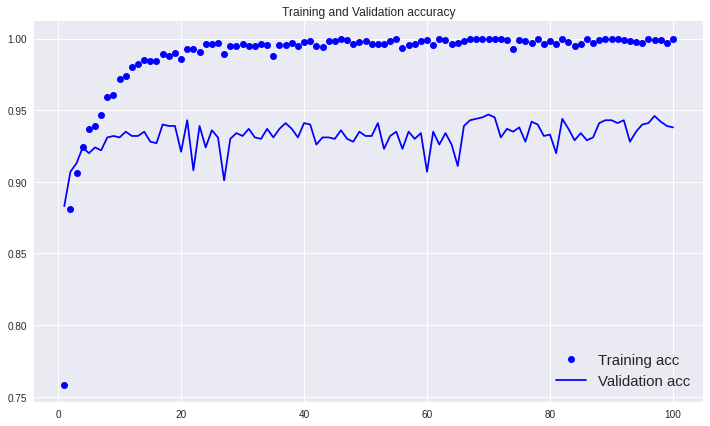

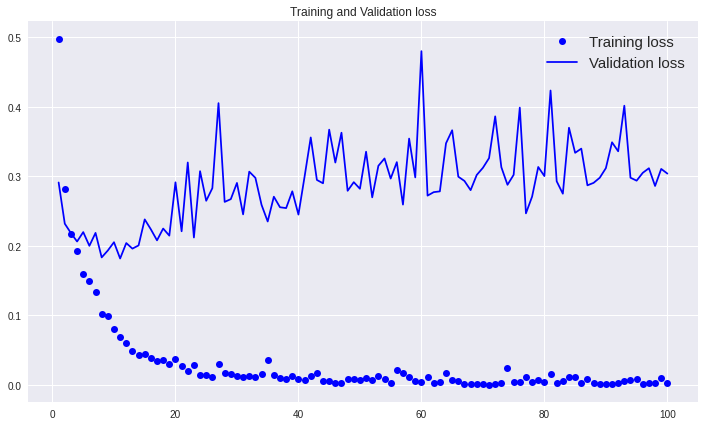

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend(fontsize = 15)

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(fontsize = 15)
plt.show()

##### [과제] 상기 과제에서 미세조정을 최상위 BLOCK 2개를 적용해서 수행하세요.
---

In [ ]:
conv_base = VGG19(weights = 'imagenet', # imagenet으로 학습한 가중치
                 include_top = False,  # 최상위 완전 연결 분류기에 대한 포함 여부
                 input_shape = (150, 150, 3))

conv_base.trainable = True

set_trainable = 0
for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = 1
    if set_trainable == 1:
        layer.trainable = True
        # print(set_trainable)
    elif set_trainable == 0:
        layer.trainable = False
        # print(set_trainable)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

base_dir = '/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255) # 검증 데이터는 절대 증식하면 안된다.

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150), # 이미지 크기를 150 x 150으로 변경
                                                    batch_size = 20,
                                                    class_mode = 'binary') # binary_crossentropy를 사용하므로 이진 레이블이 필요

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 1e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 254ms/step - loss: 0.4536 - acc: 0.7685 - val_loss: 0.2394 - val_acc: 0.8910
Epoch 2/100
100/100 [==============================] - 26s 255ms/step - loss: 0.2200 - acc: 0.9110 - val_loss: 0.1823 - val_acc: 0.9180
Epoch 3/100
100/100 [==============================] - 25s 252ms/step - loss: 0.1554 - acc: 0.9395 - val_loss: 0.1511 - val_acc: 0.9300
Epoch 4/100
100/100 [==============================] - 25s 251ms/step - loss: 0.1250 - acc: 0.9535 - val_loss: 0.1269 - val_acc: 0.9420
Epoch 5/100
100/100 [==============================] - 25s 251ms/step - loss: 0.0991 - acc: 0.9615 - val_loss: 0.1643 - val_acc: 0.9320
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0860 - acc: 0.9635 - val_loss: 0.1182 - val_acc: 0.9560
Epoch 7/100
100/100 [==============================] - 25s 251ms/step - loss: 0.0654 - acc: 0.9800 -

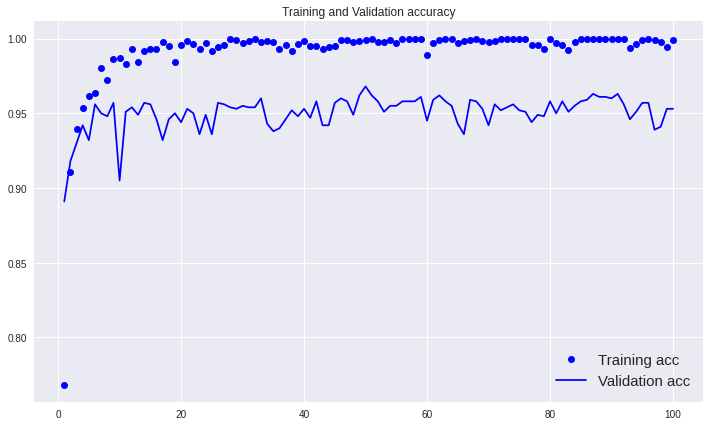

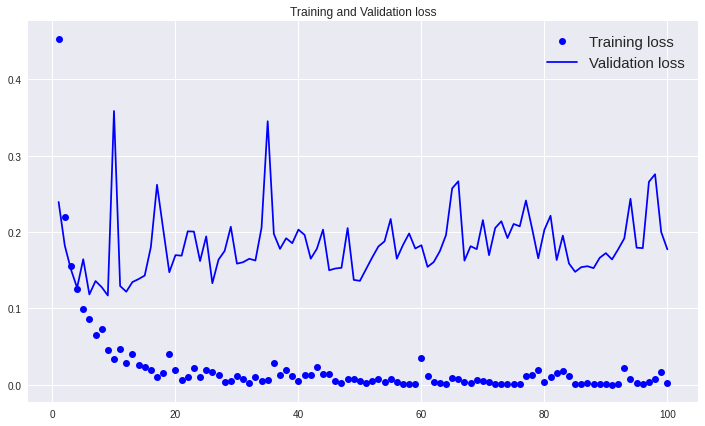

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend(fontsize = 15)

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(fontsize = 15)
plt.show()